In [1]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


# **DATA LOAD**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('vgames2.csv', index_col=0, parse_dates=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


단위 통일
------
- 매출액을 모두 단위 'M'으로 통일하고, 실수화(float) 진행

In [4]:
def change_numeric(data):
  if 'K' in data:
    data = float(data.replace('K', ''))
    data /= 1000
  elif 'M' in data:
    data = float(data.replace('M', ''))
  else:
    data = float(data)
  return data

In [5]:
df['NA_Sales'] = df['NA_Sales'].astype(str).apply(change_numeric)
df['EU_Sales'] = df['EU_Sales'].astype(str).apply(change_numeric)
df['JP_Sales'] = df['JP_Sales'].astype(str).apply(change_numeric)
df['Other_Sales'] = df['Other_Sales'].astype(str).apply(change_numeric)

In [6]:
df['total_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

## 결측치 확인
### 결측치 비율 확인

In [ ]:
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df.isna().sum() / len(df)

Name           0.000000
Platform       0.000000
Year           0.016327
Genre          0.003012
Publisher      0.003494
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64

결측치 비율 확인 결과 전체 데이터 기준 적음을 확인했다.

그러므로, 결측치가 존재하는 행 삭제도 충분히 고려 가능하다

## 게임 도메인 파악하기
###장르

In [ ]:
print(len(df['Genre'].unique()))
print(df['Genre'].unique())

13
['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter' nan]


nan을 제외한 총 12개의 장르가 존재

### Platform
총 31개의 게임 플랫폼이 존재하고, 해당 플랫폼을 출시한 회사로 묶으면 다음과 같다

In [ ]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

닌텐도
- NES : 닌텐도 엔터테인먼트 시스템 출시1983 가정용
- SNES : 슈포 닌텐도 엔터테인먼트 시스템 출시1990 가정용
- GB : 닌텐도 게임보이 출시 : 1990년 휴대용
- N64 : 닌텐도 64 출시1996 가정용
- GBA : 게임보이 어드밴스. 출시: 2001년 휴대용
- GC : 닌텐도 게임큐브 출시 : 2001년 가정용
- DS : 출시2004년 휴대용
- 3DS : 닌텐도 3DS 출시 : 2011년 휴대용
- Wii : 2006년 가정용
- WiiU : 2012년 가정용

플레이 스테이션
- PSP : 2004년 휴대용
- PSV : 플레이 스테이션 vita 2011년 휴대용
- PS : 1994년 가정용용
- PS2 : 2000년 가정용
- PS3 : 2006년 가정용
- PS4 : 2013년 가정용


엑스박스
- XB : 엑스박스 2001년 가정용
- X360 : 2005년 가정용
- XOne : 2014년 가정용

아타리
- 2600 : 아타리2600 1977년 가정용

세가
- GEN : sega genesis 1988년 가정용
- SCD : sega mega cd 1991년 가정용
- SAT : sega saturn 1994년 가정용
- DC : sega 드림캐스트 1998년 가정용
- GG : game gear 1997년 휴대용

반다이
- WS : wonderswan 1999 휴대용

SNK
- NG : neo geo 1994년 가정용

NEC
- TG16 : turgobrafx-16 1987년 가정용
- PCFX : 1994년 가정용

3DO
- 3DO : 1994년 출시 가정용


컴퓨터
- PC

가정용 게임기와 휴대용 게임기라는 변수를 추가로 설정하기로 한다.

In [28]:
class_mapping = {'GB':'portable', 'GBA':'portable', 'DS':'portable', '3DS':'portable', 'PSP':'portable', 'PSV':'portable',
                 'WS':'portable', 'GG':'portable', 'NES':'family', 'SNES':'family', 'N64':'family', 'GC':'family',
                 'Wii':'family','WiiU':'family','PS':'family','PS2':'family','PS3':'family','PS4':'family','2600':'family',
                 'XB':'family','X360':'family','XOne':'family','GEN':'family','SCD':'family','SAT':'family',
                 'DC':'family', 'NG':'family', 'TG16':'family', 'PCFX':'family', '3DO':'family', 'PC':'family'}

In [29]:
df['Use'] = df['Platform'].map(class_mapping)
df['Use']

1        portable
2          family
3        portable
4        portable
5          family
           ...   
16594      family
16595    portable
16596      family
16597    portable
16598      family
Name: Use, Length: 16598, dtype: object

추후 게임을 발매할 때 특정 회사의 플랫폼을 사용할지 정하기 위해 모회사를 나타내는 특성 변수도 새로 추가한다.

In [30]:
comp_mapping = {'NES':'Nintendo', 'SNES':'Nintendo', 'GB':'Nintendo', 'N64':'Nintendo', 'GBA':'Nintendo', 'GC':'Nintendo',
                'DS':'Nintendo', '3DS':'Nintendo', 'Wii':'Nintendo', 'WiiU':'Nintendo',
                'PSP':'Sony', 'PSV':'Sony', 'PS':'Sony', 'PS2':'Sony', 'PS3':'Sony','PS4':'Sony',
                'XB':'Microsoft', 'X360':'Microsoft', 'XOne':'Microsoft',
                '2600':'Atari', 'GEN':'Sega', 'SCD':'Sega','SAT':'Sega','DC':'Sega','GG':'Sega',
                'WS':'Bandai','NG':'SNK','TG16':'Nec', 'PCFX':'Nec', '3DO':'3DO', 'PC':'PC'
                }

In [31]:
df['Company'] = df['Platform'].map(comp_mapping)
df['Company']

1        Nintendo
2        Nintendo
3            Sony
4        Nintendo
5            Sony
           ...   
16594    Nintendo
16595        Sony
16596        Sony
16597        Sony
16598        Sony
Name: Company, Length: 16598, dtype: object

### Year 전처리

In [ ]:
df[['Year']].describe()

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Use,Company
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,portable,Nintendo
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,family,Nintendo
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,portable,Sony
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,portable,Nintendo
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,family,Sony


Year 데이터 전처리가 필요하다
- Year가 50 미만이라면, 2000을 더해준다.
  - ex: 9 -> 2009
- Year가 50 이상이라면, 1900을 더해준다.
  - ex: 97 -> 1997

In [13]:
def change_year(data):
  if data < 50:
    data += 2000
  elif data > 50 and data < 100:
    data += 1900
  return data

In [14]:
df['Year'] = df['Year'].apply(change_year)

출시년도가 비어있는 데이터(결측치)를 제외한 새로운 데이터프레임 형성

In [15]:
drop_na_year = df.loc[df['Year'].dropna(axis=0).index]
drop_na_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# 지역에 따른 선호 장르 파악

먼저 전체 장르 게임 수와 매출액을 살펴보면 다음과 같다
- 막대 그래프가 게임 발매 수를 나타내고,
- 검은색 선 그래프가 총매출액, 파란색 선 그래프가 매출액 평균을 나타낸다

In [ ]:
genre_region_sum = drop_na_year.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
genre_region_mean = drop_na_year.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


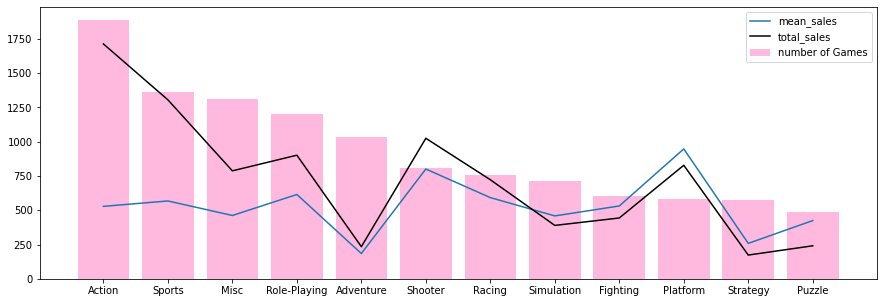

In [ ]:
index = list(drop_na_year.drop_duplicates('Name')['Genre'].value_counts().index)

plt.figure(figsize=(15,5)
plt.bar(drop_na_year.drop_duplicates('Name')['Genre'].value_counts().index,
        drop_na_year.drop_duplicates('Name')['Genre'].value_counts(),
        alpha=0.3, color='deeppink', label='number of Games')
plt.plot(index, genre_region_mean.sum(axis=1)[index]*1000, label='mean_sales')
plt.plot(index, genre_region_sum.sum(axis=1)[index], color='black', label='total_sales')
plt.legend(loc='upper right')

total_sales_mean : 0.5371641161586005
total_sales_median : 0.17


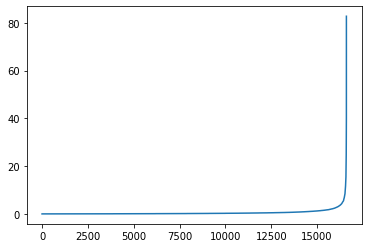

In [9]:
plt.plot(df.index,
         df['total_sales'].sort_values())
print('total_sales_mean :', df['total_sales'].mean())
print('total_sales_median :', df['total_sales'].median())

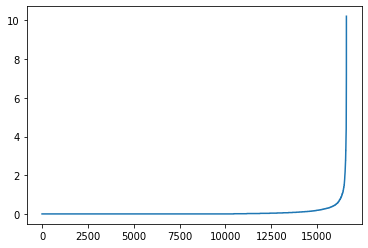

In [ ]:
plt.plot(df.index,
         df['JP_Sales'].sort_values())

전체적 게임 경향을 통해 몇가지 특징을 추려보면
1. Action이 가장 많이 발매됐으며, 총 판매량도 가장 많다. 하지만, 발행수가 많다보니, 평균 판매액은 높지 않은 편이다.
2. 게임 발매량과 다르게 평균 매출액 1등은 발매량이 적은 'Platform'이 1등을 하고 있다
3. 평균 매출액이 가장 적은 장르는 'Adventure'다. 게임 수 자체는 높지만, 총 판매액이 낮다.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

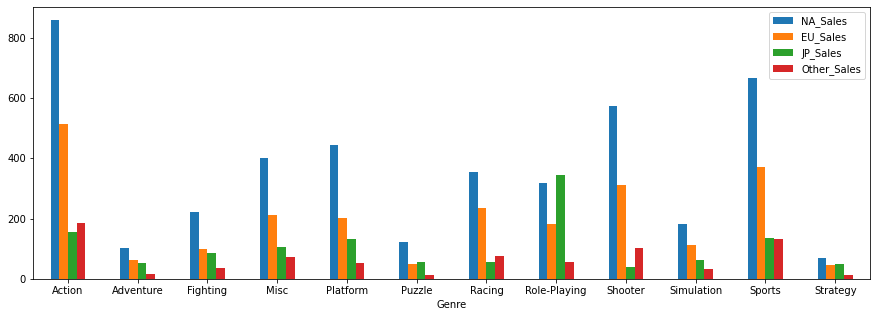

In [ ]:
drop_na_year.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().plot.bar(figsize=(15,5))
plt.xticks(rotation=0)

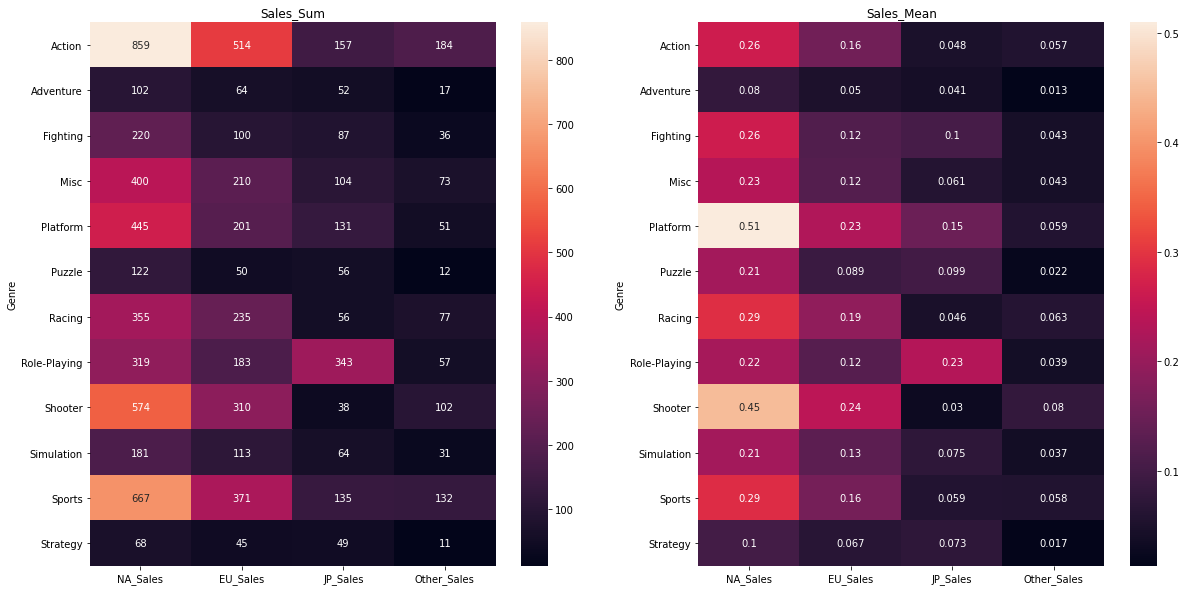

In [ ]:
plt.figure(figsize=(20,10))
region_sales = drop_na_year[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
plt.subplot(121)
plt.title('Sales_Sum')
sns.heatmap(region_sales.groupby('Genre').sum(),
            annot=True, fmt='.0f')
plt.subplot(122)
plt.title('Sales_Mean')
sns.heatmap(region_sales.groupby('Genre').mean(),
            annot=True)

## 북미지역
지역과 장르별로 총 판매량을 계산해보면 다음과 같다.
1. 북미 지역
  - 북미지역에서는 'Action'이 가장 많이 팔렸다.
  - 판매량으로 본 북미 장르 트렌드는 'Action, Shooter, Sports, Platform'이다.
  - 평균판매액으로 본 북미 장르 트렌드는 'Platform, Racing' 정도이다.
  


In [ ]:
from scipy import stats

In [ ]:
# 정규성 검정
stats.kstest(drop_na_year['NA_Sales'], 'norm')

KstestResult(statistic=0.5, pvalue=0.0)

In [ ]:
NA_genre = ['Shooter', 'Platform', 'Sports', 'Action', 'Racing']
for genre in NA_genre:
  data1 = drop_na_year.loc[drop_na_year['Genre']==genre, 'NA_Sales']
  data2 = drop_na_year.loc[drop_na_year['Genre']!=genre, 'NA_Sales']
  print('Genre:{}, T-test Result:{}'.format(genre,stats.ttest_ind(data1, data2)))

Genre:Shooter, T-test Result:Ttest_indResult(statistic=8.336433318557186, pvalue=8.259940461192731e-17)
Genre:Platform, T-test Result:Ttest_indResult(statistic=9.053553352983336, pvalue=1.5371654390467059e-19)
Genre:Sports, T-test Result:Ttest_indResult(statistic=1.5630217503723345, pvalue=0.11806686242860137)
Genre:Action, T-test Result:Ttest_indResult(statistic=-0.040479483003642895, pvalue=0.9677113588340046)
Genre:Racing, T-test Result:Ttest_indResult(statistic=1.1191868462229977, pvalue=0.2630769026177748)


t-검정을 수행해본 결과
- 평균 판매액이 높은 'Shooter'와 'Platform'은 이를 제외한 다른 장르의 평균판매액과 유의미한 차이를 보인다(p-value가 매우 작다)
- 하지만 총판매액은 높지만, 평균 판매액이 높지 않은 'Sports'와 'Action'은 p-value가 0.05 이상으로 총 평균 판매액과 유의미한 차이를 보이지 않는다

## 유럽 지역
2. 유럽 지역
- 유럽 지역 총 판매액을 살펴보면, 북미와 유사한 경향을 나타낸다
  - 'Action', 'Sports', 'Shooter', 'Racing', 'Platform'의 총 판매액이 높게 나타난다.
- 평균 판매액을 살펴보면, 'Platform', 'Shooter', 'Racing'이 높게 나타난다.

In [ ]:
stats.kstest(drop_na_year['EU_Sales'], 'norm')

KstestResult(statistic=0.5, pvalue=0.0)

In [ ]:
EU_genre = ['Platform', 'Shooter', 'Racing', 'Action', 'Sports']
for genre in EU_genre:
  data1 = drop_na_year.loc[drop_na_year['Genre']==genre, 'EU_Sales']
  data2 = drop_na_year.loc[drop_na_year['Genre']!=genre, 'EU_Sales']
  print('Genre:{}, T-test Result:{}'.format(genre,stats.ttest_ind(data1, data2)))

Genre:Platform, T-test Result:Ttest_indResult(statistic=4.902558715503413, pvalue=9.550520728156194e-07)
Genre:Shooter, T-test Result:Ttest_indResult(statistic=6.955233547823387, pvalue=3.653306258717174e-12)
Genre:Racing, T-test Result:Ttest_indResult(statistic=3.219300953762219, pvalue=0.0012875476941908548)
Genre:Action, T-test Result:Ttest_indResult(statistic=1.3600148270022165, pvalue=0.17384401254798873)
Genre:Sports, T-test Result:Ttest_indResult(statistic=1.403855729249423, pvalue=0.1603808371517072)


t-test 검정 결과도 'Platform'과 'Shooter', 'Racing' 장르가 이를 제외한 매출액 평균과 유의미한 차이가 나타난다

## 일본 지역
3. 일본 지역
- 일본은 특이하게 'Role-Playing'장르가 매우 많이 팔렸음을 알 수 있다. 총판매액으로 살펴보면, 'Role-Playing, Action, Sports, Platform' 순서이다.
- 평균 판매액으로 살펴보면, 'Role-Playing, Platform, Fighting, Puzzle' 순서이다.


In [ ]:
stats.kstest(drop_na_year['JP_Sales'], 'norm')

KstestResult(statistic=0.5, pvalue=0.0)

In [ ]:
JP_genre = ['Role-Playing', 'Platform', 'Fighting', 'Puzzle']
for genre in JP_genre:
  data1 = drop_na_year.loc[drop_na_year['Genre']==genre, 'JP_Sales']
  data2 = drop_na_year.loc[drop_na_year['Genre']!=genre, 'JP_Sales']
  print('Genre:{}, T-test Result:{}'.format(genre,stats.ttest_ind(data1, data2)))

Genre:Role-Playing, T-test Result:Ttest_indResult(statistic=20.248573169902464, pvalue=4.6571921109755276e-90)
Genre:Platform, T-test Result:Ttest_indResult(statistic=6.9043478828118285, pvalue=5.2292547742942514e-12)
Genre:Fighting, T-test Result:Ttest_indResult(statistic=2.4472239320579683, pvalue=0.014406600294697704)
Genre:Puzzle, T-test Result:Ttest_indResult(statistic=1.5969374487416512, pvalue=0.1102990061479218)


t-test 검정 결과, 'Role-Playing', 'Platform', 'Fighting'의 p-value가 0.05 미만으로 유의미한 차이를 보인다.
'Puzzle'의 겨우, 총판매액 대비 평균 판매액은 높은 편이지만, 전체 평균과 비교했을 때 유의미한 차이를 나타내지 않는다.

## 정리
정리하면, 
- NA에서는 Platform, Shooter 장르 비율이 높고
  - Platform : 슈퍼마리오
  - Shooter : 콜 오브 듀티
- EU에서는 Platform, Shooter, Racing
  - Racing : Gran Turismo
- JP에서는 Role-Playing, Platform, Fighting 장르가 평균적으로 판매가 많이되고 있다
  - Role-Playing : 포켓몬, 드래곤퀘스트, 몬스터헌터
  - Fighting : 스트리트파이터, 철권, 드래곤볼Z

In [ ]:
region_sales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0.00,0.00,0.00
2,Action,0.17,0.00,0.00,0.01
3,Adventure,0.00,0.00,0.02,0.00
4,Misc,0.04,0.00,0.00,0.00
5,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16594,Platform,0.15,0.04,0.00,0.01
16595,Action,0.01,0.00,0.00,0.00
16596,Sports,0.44,0.19,0.03,0.13
16597,Action,0.05,0.05,0.25,0.03


# 연도별 게임 트렌드

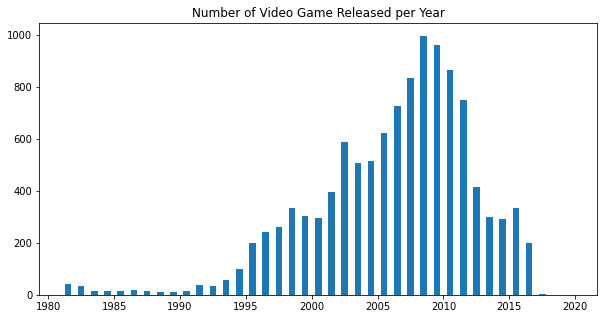

In [346]:
plt.figure(figsize=(10,5))
plt.title('Number of Video Game Released per Year')
plt.hist(drop_na_year.drop_duplicates('Name')['Year'], bins=[a for a in range(1981,2021)],
         rwidth=0.5);

플레이스테이션과 XBOX가 콘솔 게임 업계에서 치열하게 경쟁하고, 닌텐도DS의 등장으로 휴대용 게임기가 급격하게 발전하던 2010년 초중반까지 비디오게임 발매량량은 급속도로 증가하였다.

하지만, 게임 산업의 흐름이 스팀을 위주로 한 PC 게임 위주로 재편되면서 비디오 게임 발매는 점차 줄어들고 있다.

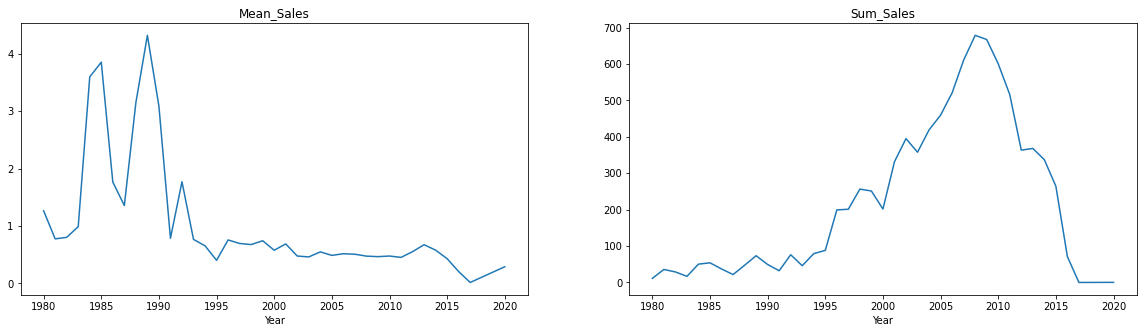

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Mean_Sales')
drop_na_year.groupby('Year')['total_sales'].mean().plot();
plt.subplot(122)
plt.title('Sum_Sales')
drop_na_year.groupby('Year')['total_sales'].sum().plot();

In [ ]:
pivot_data = drop_na_year.pivot_table(index='Year', columns='Genre', values='total_sales', aggfunc='mean')

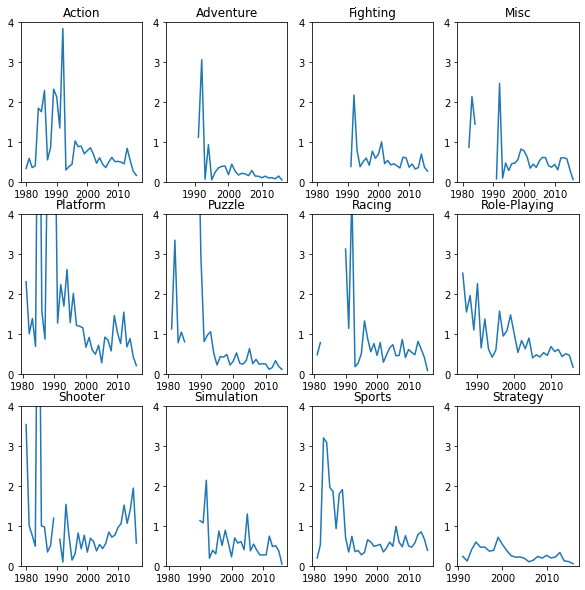

In [ ]:
plt.figure(figsize=(10,10))
for i, column in enumerate(pivot_data.columns):
  plt.subplot(3,4,i+1)
  plt.title(column)
  plt.ylim(0, 4)
  plt.plot(pivot_data.iloc[:-2][column])

연도별로 데이터를 시각화하니 직관적이지 못한 그래프가 나타난다. 
- 게임 산업이 전체적으로 감소할 때 전체 장르가 감소하는 경향이 나타나기에 유의미한 경향성을 발견하기 힘들다
- 그렇기에 연도를 범주화해 표현하기로 한다. 범주는 다음과 같다. 
  - 1980~1999
  - 2000~2005
  - 2005~2010
  - 2010~2016

## 1980~1999년
먼저 1980~1999년을 살펴보면,

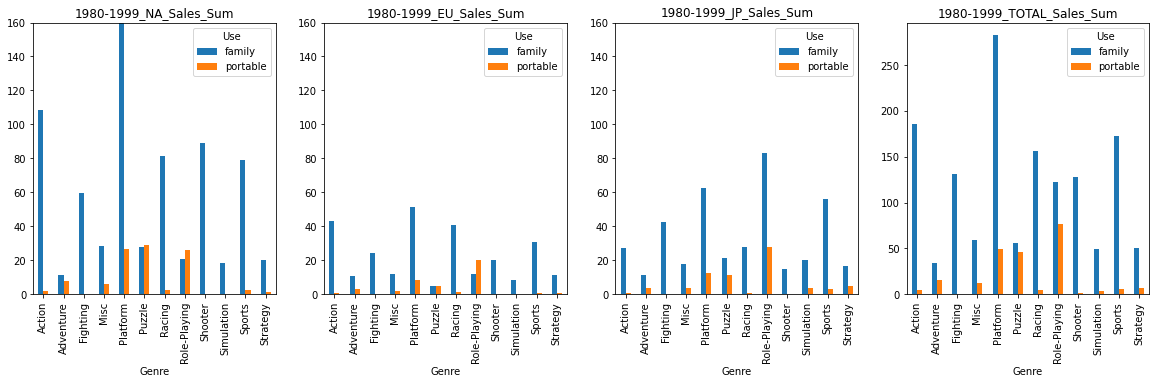

In [ ]:
cond = (drop_na_year['Year'] <= 1999)

fig, axes = plt.subplots(nrows=1, ncols=4)

axes[0].set_title('1980-1999_NA_Sales_Sum');
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='NA_Sales', aggfunc='sum').plot.bar(ax=axes[0], figsize=(20,5), ylim=(0,160));
axes[1].set_title('1980-1999_EU_Sales_Sum');
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='EU_Sales', aggfunc='sum').plot.bar(ax=axes[1], figsize=(20,5), ylim=(0,160));
axes[2].set_title('1980-1999_JP_Sales_Sum');
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='JP_Sales', aggfunc='sum').plot.bar(ax=axes[2], figsize=(20,5), ylim=(0,160));
axes[3].set_title('1980-1999_TOTAL_Sales_Sum');
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='total_sales', aggfunc='sum').plot.bar(ax=axes[3], figsize=(20,5));

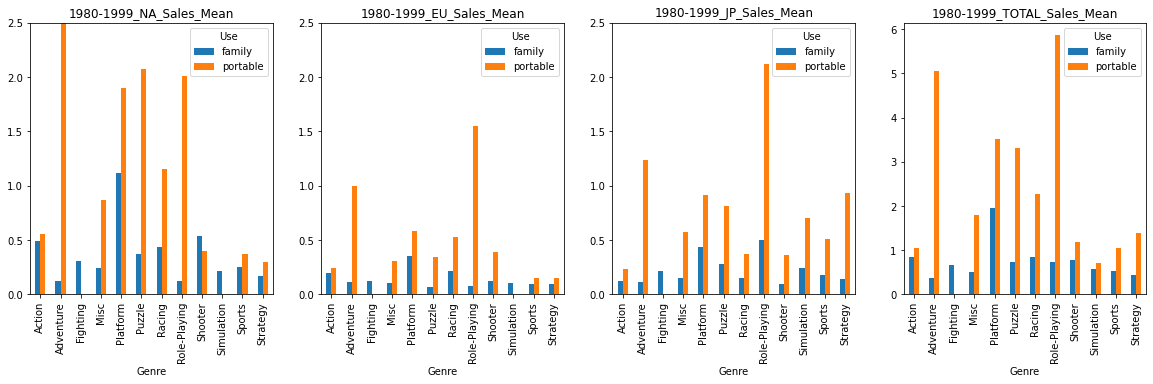

In [ ]:
cond = (drop_na_year['Year'] <= 1999)

fig, axes = plt.subplots(nrows=1, ncols=4)
axes[0].set_title('1980-1999_NA_Sales_Mean');
axes[1].set_title('1980-1999_EU_Sales_Mean');
axes[2].set_title('1980-1999_JP_Sales_Mean');
axes[3].set_title('1980-1999_TOTAL_Sales_Mean');
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='NA_Sales', aggfunc='mean').plot.bar(ax=axes[0], figsize=(20,5), ylim=(0,2.5));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='EU_Sales', aggfunc='mean').plot.bar(ax=axes[1], figsize=(20,5), ylim=(0,2.5));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='JP_Sales', aggfunc='mean').plot.bar(ax=axes[2], figsize=(20,5), ylim=(0,2.5));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='total_sales', aggfunc='mean').plot.bar(ax=axes[3], figsize=(20,5));

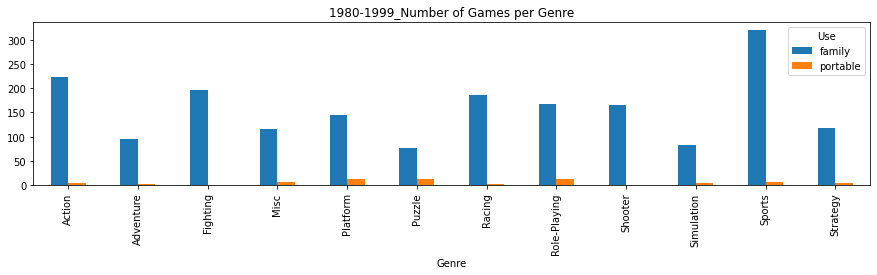

In [ ]:
cond = (drop_na_year['Year'] <= 1999)
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='Name', aggfunc='count').plot.bar(figsize=(15,3));
plt.title('1980-1999_Number of Games per Genre');

1. 1980~1999년 총 매출액 및 평균 매출액을 살펴보면면 단연 'Platform' 장르가 돋보인다.
  - Platform 장르란, 슈퍼마리오, 메탈슬러그 같이 발판(platform)이 등장하는 게임 장르이다.
  - 게임 기술이 아직 발전하지 못했던 1900년대 후반, 2D의 Platform 게임이 선풍적 인기를 이끌었고, 여기에 슈퍼마리오가 큰 기여를 했다
  - 하지만 매출액과 달리, 장르별 발매된 게임 개수를 살펴보면, 스포츠 장르가 압도적으로 많고, 'Platform' 장르는 오히려 중간 순위인 것을 알 수 있다.

대표게임
  - 포켓몬
  - 젤다의 전설
  - 테트리스
  - 팩맨
  - 마리오카트
  - 동키콩

In [ ]:
cond = (drop_na_year['Year'] <= 1999)
drop_na_year.loc[cond].sort_values('NA_Sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,Use,Company
4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,family,Nintendo
10489,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,family,Nintendo
1204,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,portable,Nintendo
13112,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62,family,Nintendo
7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,portable,Nintendo
9492,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,portable,Nintendo
14857,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,family,Nintendo
9417,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09,portable,Nintendo
5821,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81,family,Atari
6459,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.90,family,Nintendo


2. 휴대용 게임기의 성장
  - 총 게임 발매수를 보면, 휴대용 게임기는 발매된 게임이 가정용 게임기에 비해 현저하게 적다.
  - 하지만 평균 판매액을 보면, 휴대용 게임기가 가정용 게임기를 대부분의 장르에서 앞서나간다
  - 즉, 1980~1999년은 휴대용 게임기의 성장기라 볼 수 있다

In [ ]:
count_pivot = drop_na_year.drop_duplicates('Name').pivot_table(index='Year', columns='Genre', values='Name', aggfunc='count')

## 2000~2005년
다음은 2000~2005년 게임이다

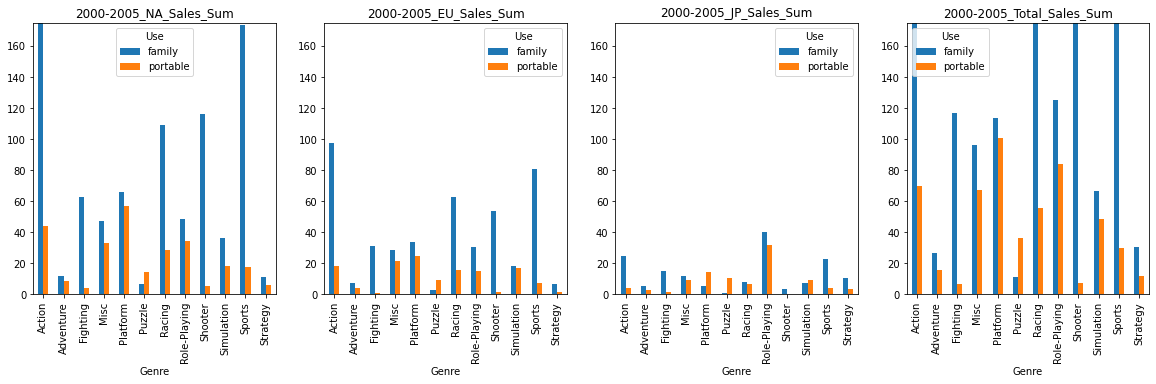

In [ ]:
cond = (drop_na_year['Year'] >=2000) & (drop_na_year['Year']<2006)

fig, axes = plt.subplots(nrows=1, ncols=4)

axes[0].set_title('2000-2005_NA_Sales_Sum');
axes[1].set_title('2000-2005_EU_Sales_Sum');
axes[2].set_title('2000-2005_JP_Sales_Sum');
axes[3].set_title('2000-2005_Total_Sales_Sum');
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='NA_Sales', aggfunc='sum').plot.bar(ax=axes[0], figsize=(20,5), ylim=(0,175));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='EU_Sales', aggfunc='sum').plot.bar(ax=axes[1], figsize=(20,5), ylim=(0,175));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='JP_Sales', aggfunc='sum').plot.bar(ax=axes[2], figsize=(20,5), ylim=(0,175));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='total_sales', aggfunc='sum').plot.bar(ax=axes[3], figsize=(20,5), ylim=(0,175));

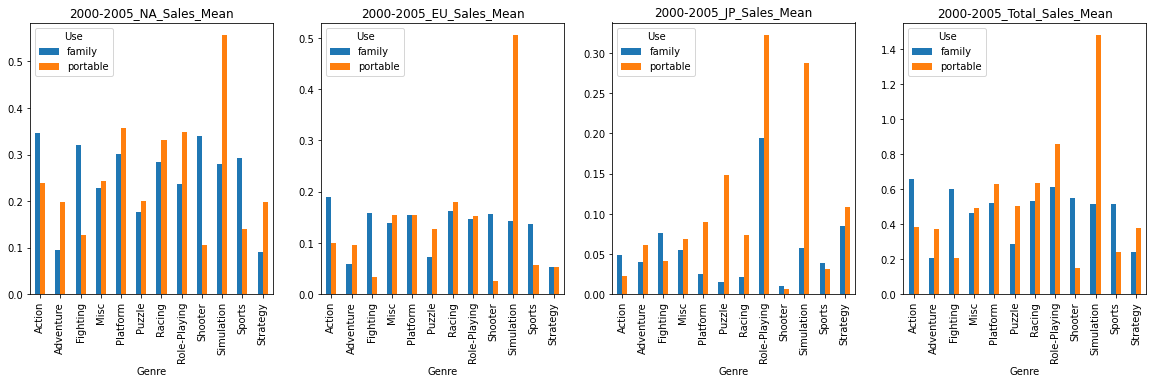

In [ ]:
cond = (drop_na_year['Year'] >=2000) & (drop_na_year['Year']<2006)

fig, axes = plt.subplots(nrows=1, ncols=4)
axes[0].set_title('2000-2005_NA_Sales_Mean');
axes[1].set_title('2000-2005_EU_Sales_Mean');
axes[2].set_title('2000-2005_JP_Sales_Mean');
axes[3].set_title('2000-2005_Total_Sales_Mean');
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='NA_Sales', aggfunc='mean').plot.bar(ax=axes[0], figsize=(20,5));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='EU_Sales', aggfunc='mean').plot.bar(ax=axes[1], figsize=(20,5));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='JP_Sales', aggfunc='mean').plot.bar(ax=axes[2], figsize=(20,5));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='total_sales', aggfunc='mean').plot.bar(ax=axes[3], figsize=(20,5));

1.2000~2005년 가장 주목할만한 점은 바로 'Simulation'의 압도적 평균 매출액이다.
- 이는 동물의숲(animal-crossing)과 강아지키우기(Nintendogs)의 영향이다. 이 둘을 제외하면 'Simulation' 장르는 매출액이 높지 않다.
- 발매된 게임 장르 개수를 살펴보면 'Action'과 'Sport'가 매우 높음을 알 수 있다
- Simulation 장르는 휴대용 게임기로 플레이했을 때 그 효과가 증가한다. 큰 모니터가 필요한 게임이 아니라, 오히려 오래동안 플레이할 수 있는 게 중요한 요소기 때문이다

2. 북미 지역은 가정용 게임기가 대세를 이루고, TV와 연결해 게임을 주로 즐기기에, Action, Sports, Racing, Shooter와 같은 장르가 여전히 대세이다

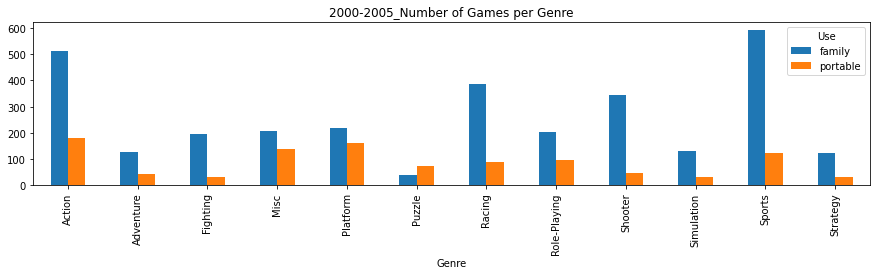

In [ ]:
cond = (drop_na_year['Year'] >=2000) & (drop_na_year['Year']<2006)
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='Name', aggfunc='count').plot.bar(figsize=(15,3))
plt.title('2000-2005_Number of Games per Genre');

## 2006~2011년


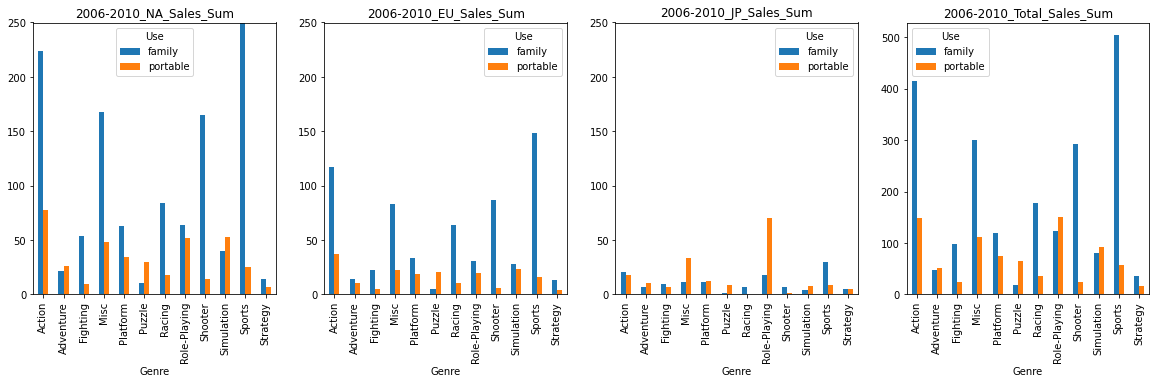

In [ ]:
cond = (drop_na_year['Year'] < 2011) & (drop_na_year['Year'] >=2006)

fig, axes = plt.subplots(nrows=1, ncols=4)
axes[0].set_title('2006-2010_NA_Sales_Sum');
axes[1].set_title('2006-2010_EU_Sales_Sum');
axes[2].set_title('2006-2010_JP_Sales_Sum');
axes[3].set_title('2006-2010_Total_Sales_Sum');

pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='NA_Sales', aggfunc='sum').plot.bar(ax=axes[0], figsize=(20,5), ylim=(0,250));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='EU_Sales', aggfunc='sum').plot.bar(ax=axes[1], figsize=(20,5), ylim=(0,250));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='JP_Sales', aggfunc='sum').plot.bar(ax=axes[2], figsize=(20,5), ylim=(0,250));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='total_sales', aggfunc='sum').plot.bar(ax=axes[3], figsize=(20,5));

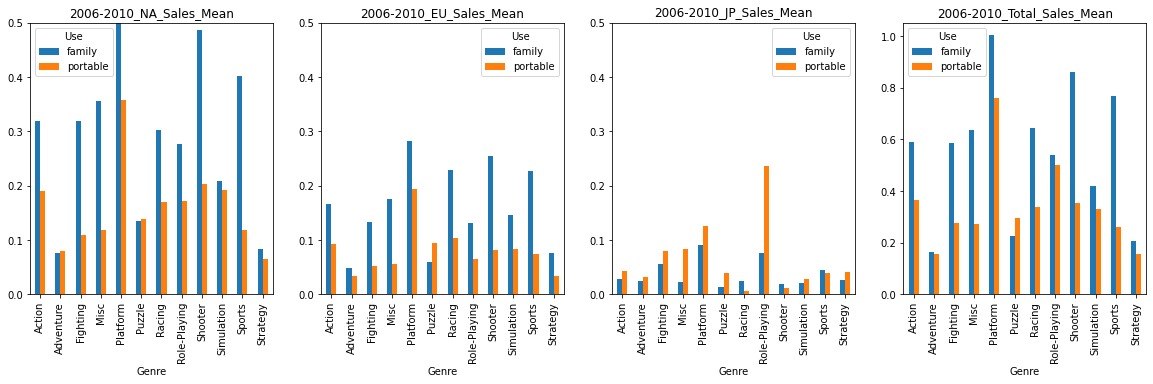

In [ ]:
cond = (drop_na_year['Year'] < 2011) & (drop_na_year['Year'] >=2006)

fig, axes = plt.subplots(nrows=1, ncols=4)
axes[0].set_title('2006-2010_NA_Sales_Mean');
axes[1].set_title('2006-2010_EU_Sales_Mean');
axes[2].set_title('2006-2010_JP_Sales_Mean');
axes[3].set_title('2006-2010_Total_Sales_Mean');

pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='NA_Sales', aggfunc='mean').plot.bar(ax=axes[0], figsize=(20,5), ylim=(0,0.5));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='EU_Sales', aggfunc='mean').plot.bar(ax=axes[1], figsize=(20,5), ylim=(0,0.5));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='JP_Sales', aggfunc='mean').plot.bar(ax=axes[2], figsize=(20,5), ylim=(0,0.5));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='total_sales', aggfunc='mean').plot.bar(ax=axes[3], figsize=(20,5));

2006~2010년은 비디오게임의 전성기라 할 수 있다.
- 마이크로소프트의 XBOX와 소니의 플레이스테이션의 경쟁이 있었고, 
- 닌텐도 최고 효자 상품인 닌텐도DS의 전성기였다. 또한, 닌텐도 wii의 등장으로 새로운 플레이 방식이 나타났다.
- 그렇기에 가정용, 휴대용 모두 최고 매출을 기록하고, 발매수 또한 역대 최고치이다.

대표작들은 다음과 같다
- Wii Sports, Wii Play, Wii Fit, 저스트댄스
- 콜오브 듀티
- 슈퍼마리오
- GTA

In [ ]:
cond = (drop_na_year['Year'] < 2011) & (drop_na_year['Year'] >=2006)
drop_na_year.loc[cond].sort_values('total_sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,Use,Company
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,family,Nintendo
12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,family,Nintendo
3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,family,Nintendo
6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,portable,Nintendo
3015,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,family,Nintendo
16532,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,family,Nintendo
3436,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,family,Nintendo
10900,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,family,Nintendo
4344,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,family,Microsoft
10556,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35,portable,Nintendo


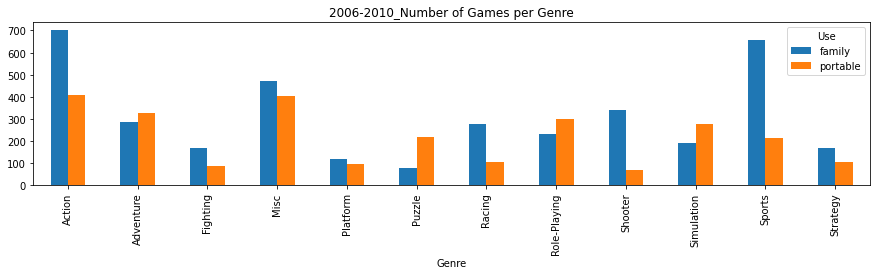

In [ ]:
cond = (drop_na_year['Year'] < 2011) & (drop_na_year['Year'] >=2006)
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='Name', aggfunc='count').plot.bar(figsize=(15,3))
plt.title('2006-2010_Number of Games per Genre');

2006년~ 2010년에서 주목할 점은 바로 'Platform' 장르 생산량의 하향이다.
- 'Platform'장르는 1990년대 게임 기술이 좋지 않던 시절, 게임의 대량 생산을 가능하게 해줬던 장르였다. 
- 하지만 기술이 발전하고 게임 그래픽 퀄리티를 중요하게 여기는 소비자가 증가함에 따라 'Platform'는 하향세로 접어들었다. 
- 그렇지만 매출 그래프를 보면, 'Platform' 장르의 평균 매출액이 매우 높음을 알 수 있다. 이는 팬덤층을 확고하게 보유한 '슈퍼마리오' 시리즈와 닌텐도 Wii 덕분이다.

## 2011~2017년
다음은 2011년 ~ 2017년이다

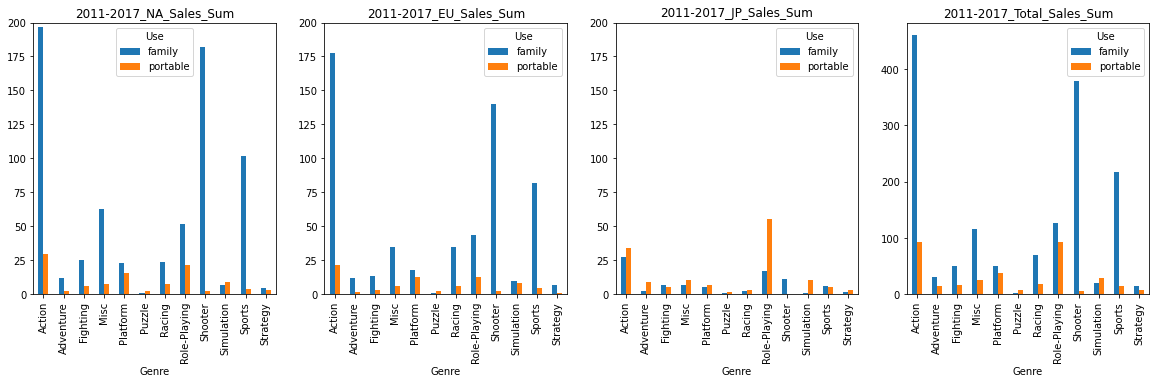

In [ ]:
cond = (drop_na_year['Year'] < 2017) & (drop_na_year['Year'] >=2011)

fig, axes = plt.subplots(nrows=1, ncols=4)
axes[0].set_title('2011-2017_NA_Sales_Sum');
axes[1].set_title('2011-2017_EU_Sales_Sum');
axes[2].set_title('2011-2017_JP_Sales_Sum');
axes[3].set_title('2011-2017_Total_Sales_Sum');
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='NA_Sales', aggfunc='sum').plot.bar(ax=axes[0], figsize=(20,5), ylim=(0,200));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='EU_Sales', aggfunc='sum').plot.bar(ax=axes[1], figsize=(20,5), ylim=(0,200));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='JP_Sales', aggfunc='sum').plot.bar(ax=axes[2], figsize=(20,5), ylim=(0,200));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='total_sales', aggfunc='sum').plot.bar(ax=axes[3], figsize=(20,5));

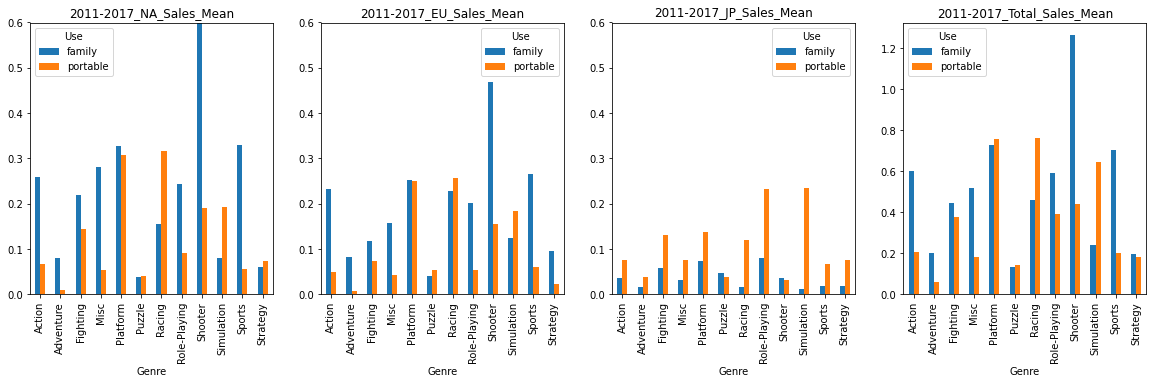

In [ ]:
cond = (drop_na_year['Year'] < 2017) & (drop_na_year['Year'] >=2011)
fig, axes = plt.subplots(nrows=1, ncols=4)
axes[0].set_title('2011-2017_NA_Sales_Mean');
axes[1].set_title('2011-2017_EU_Sales_Mean');
axes[2].set_title('2011-2017_JP_Sales_Mean');
axes[3].set_title('2011-2017_Total_Sales_Mean');
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='NA_Sales', aggfunc='mean').plot.bar(ax=axes[0], figsize=(20,5), ylim=(0,0.6));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='EU_Sales', aggfunc='mean').plot.bar(ax=axes[1], figsize=(20,5), ylim=(0,0.6));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='JP_Sales', aggfunc='mean').plot.bar(ax=axes[2], figsize=(20,5), ylim=(0,0.6));
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='total_sales', aggfunc='mean').plot.bar(ax=axes[3], figsize=(20,5));

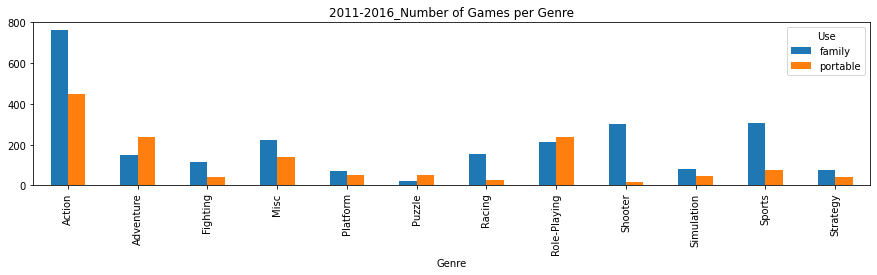

In [ ]:
cond = (drop_na_year['Year'] < 2017) & (drop_na_year['Year'] >=2011)
pd.pivot_table(drop_na_year.loc[cond], index='Genre', columns='Use', values='Name', aggfunc='count').plot.bar(figsize=(15,3))
plt.title('2011-2016_Number of Games per Genre');

In [ ]:
cond = (drop_na_year['Year'] < 2017) & (drop_na_year['Year'] >=2011) & (drop_na_year['Genre']=='Action')
drop_na_year[cond].sort_values('total_sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,Use,Company
3484,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,family,Sony
10914,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,family,Microsoft
2009,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99,family,Sony
9036,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25,family,Sony
11869,Uncharted 3: Drake's Deception,PS3,2011.0,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,6.82,family,Sony
1630,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2.56,0.16,1.14,6.50,family,Sony
8083,The Last of Us,PS3,2013.0,Action,Sony Computer Entertainment Europe,2.41,2.28,0.28,1.01,5.98,family,Sony
14824,Batman: Arkham City,PS3,2011.0,Action,Warner Bros. Interactive Entertainment,2.70,1.91,0.11,0.80,5.52,family,Sony
15640,Assassin's Creed III,X360,2012.0,Action,Ubisoft,3.13,1.71,0.03,0.44,5.31,family,Microsoft
12464,FIFA Soccer 13,X360,2012.0,Action,Electronic Arts,1.08,3.48,0.03,0.58,5.17,family,Microsoft


In [ ]:
cond = (drop_na_year['Year'] < 2017) & (drop_na_year['Year'] >=2011) & (drop_na_year['Genre']=='Role-Playing')
drop_na_year[cond].sort_values('total_sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,Use,Company
4252,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,portable,Nintendo
11520,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84,family,Microsoft
15679,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.34,portable,Nintendo
11293,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96,family,Sony
6103,The Elder Scrolls V: Skyrim,PS3,2011.0,Role-Playing,Bethesda Softworks,2.55,2.71,0.25,1.05,6.56,family,Sony
10431,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.00,0.62,5.20,family,PC
16290,Fallout 4,XOne,2015.0,Role-Playing,Bethesda Softworks,2.45,1.26,0.01,0.37,4.09,family,Microsoft
538,Monster Hunter 4 Ultimate,3DS,2014.0,Role-Playing,Nintendo,0.67,0.49,2.62,0.11,3.89,portable,Nintendo
1639,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,Bethesda Softworks,1.15,2.09,0.00,0.64,3.88,family,PC
15568,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,0.96,2.00,0.21,0.56,3.73,family,Sony


2011년~ 2017년
1. 비디오게임의 쇠퇴
- 현재 게임산업계는 비디오게임에서 PC게임으로 넘어가고 있는데, 이는 2010년초반부터 시작되었다.
- 멀티플레이의 어려움, 비싼 가격 등의 이유로 게임 산업은 PC게임 위주로 빠르게 바뀌어갔다.
2. 그래픽 기술의 발달
- 그래픽 기술의 발달로 'Shooter' 장르의 엄청난 매출액 증가가 돋보인다.
- 게임 그래픽 기술이 발달해 미국 FPS 장르의 상징이라 할 수 있는 콜오브듀티가 대대적 흥행에 성공했고,
- XBOX 독점 게임 'HALO' 또한 큰 인기를 얻었다.
- 좋지 못한 그래픽 기술로 항상 발매량은 많지만 평균 판매액이 낮았던 Shooter 장르가 빛을 보기 시작했다
3. Role-Playing 가능성 확대
- 그래픽 기술 발달로 세계관 확장이 가능해졌다.
- Role-Playing 장르는 그래픽 기술이 좋지 못할때 게임 세계관으로의 몰입력이 낮아 크게 빛을 보지 못하였다. (Role-Playing 장르의 매출은 대부분 포켓몬이 담당하였고, 포켓몬은 그래픽이 장점인 게임이 아니다)
- 그래픽 기술의 발달로 스카이림, 폴아웃, 디아블로, 위쳐와 같은 게임들이 등장하기 시작했다

# 매출 Top10

In [32]:
duplicated_game = df.loc[df.duplicated(['Name'])]
duplicated_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,Use,Company
132,Call of Duty 4: Modern Warfare,PC,2007.0,Shooter,Activision,0.00,1.12,0.00,0.03,1.15,family,PC
231,IL-2 Sturmovik: Birds of Prey,DS,2009.0,Simulation,505 Games,0.06,0.00,0.00,0.00,0.06,portable,Nintendo
251,NASCAR Unleashed,3DS,2011.0,Racing,Activision,0.18,0.00,0.00,0.01,0.19,portable,Nintendo
280,The Incredibles: Rise of the Underminer,XB,2005.0,Action,THQ,0.06,0.02,0.00,0.00,0.08,family,Microsoft
344,NBA 2K12,X360,2011.0,Sports,Take-Two Interactive,2.31,0.14,0.01,0.16,2.62,family,Microsoft
...,...,...,...,...,...,...,...,...,...,...,...,...
16592,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53,family,Sony
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,family,Nintendo
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,family,Sony
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,portable,Sony


In [33]:
duplicated_game_sales = duplicated_game.groupby('Name', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'total_sales']].sum()

In [34]:
duplicated_game_sales

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,007: Quantum of Solace,1.67,1.35,0.04,0.42,3.48
1,007: The World is not Enough,0.51,0.35,0.00,0.06,0.92
2,11eyes: CrossOver,0.00,0.00,0.02,0.00,0.02
3,18 Wheeler: American Pro Trucker,0.20,0.15,0.00,0.05,0.40
4,187: Ride or Die,0.05,0.01,0.00,0.00,0.06
...,...,...,...,...,...,...
2770,iCarly,0.42,0.00,0.00,0.03,0.45
2771,iCarly 2: iJoin The Click!,0.08,0.01,0.00,0.01,0.10
2772,nail'd,0.08,0.02,0.00,0.02,0.12
2773,pro evolution soccer 2011,0.46,1.84,0.91,0.71,3.92


In [35]:
new_df = pd.DataFrame()
new_df = pd.concat([new_df, duplicated_game_sales], axis=0)
new_df = pd.concat([new_df, df.drop_duplicates('Name', keep=False)[['Name','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'total_sales']]], axis=0)
new_df

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,007: Quantum of Solace,1.67,1.35,0.04,0.42,3.48
1,007: The World is not Enough,0.51,0.35,0.00,0.06,0.92
2,11eyes: CrossOver,0.00,0.00,0.02,0.00,0.02
3,18 Wheeler: American Pro Trucker,0.20,0.15,0.00,0.05,0.40
4,187: Ride or Die,0.05,0.01,0.00,0.00,0.06
...,...,...,...,...,...,...
16587,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,0.00,0.00,0.08,0.01,0.09
16590,Namco Soccer Prime Goal,0.00,0.00,0.12,0.01,0.13
16591,White Album: Tsuzurareru Fuyu no Omoide,0.00,0.00,0.05,0.00,0.05
16593,Minna no Chizu 2,0.00,0.00,0.02,0.00,0.02


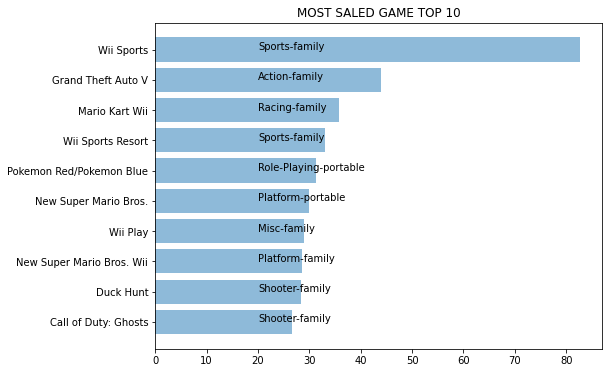

In [51]:
plt.figure(figsize=(8,6))
plt.barh(new_df.sort_values('total_sales', ascending=False)[:10]['Name'][::-1],
         new_df.sort_values('total_sales', ascending=False)[:10]['total_sales'][::-1],
         alpha=0.5);
plt.title('MOST SALED GAME TOP 10')
for index in range(10):
  name = new_df.sort_values('total_sales', ascending=False)[:10]['Name'][::-1].iloc[index]
  genre = df.loc[df['Name']==name].iloc[0]['Genre']
  use = df.loc[df['Name']==name].iloc[0]['Use']
  plt.text(20, index, genre+'-'+use)

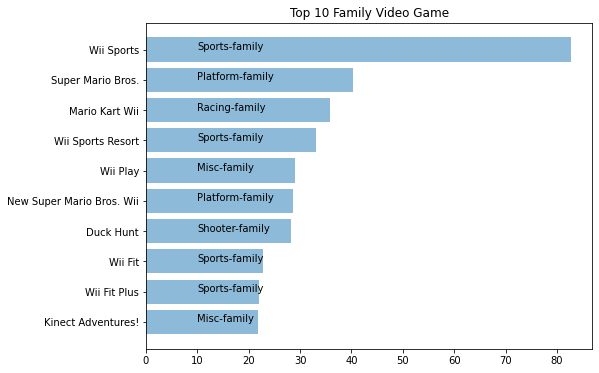

In [58]:
plt.figure(figsize=(8,6))
plt.barh(df.loc[df['Use']=='family'].sort_values('total_sales', ascending=False)[:10]['Name'][::-1],
         df.loc[df['Use']=='family'].sort_values('total_sales', ascending=False)[:10]['total_sales'][::-1],
         alpha=0.5);
plt.title('Top 10 Family Video Game')
for index in range(10):
  genre = df.loc[df['Use']=='family'].sort_values('total_sales', ascending=False)[:10]['Genre'][::-1].iloc[index]
  use = df.loc[df['Use']=='family'].sort_values('total_sales', ascending=False)[:10]['Use'][::-1].iloc[index]
  plt.text(10, index, genre+'-'+use)

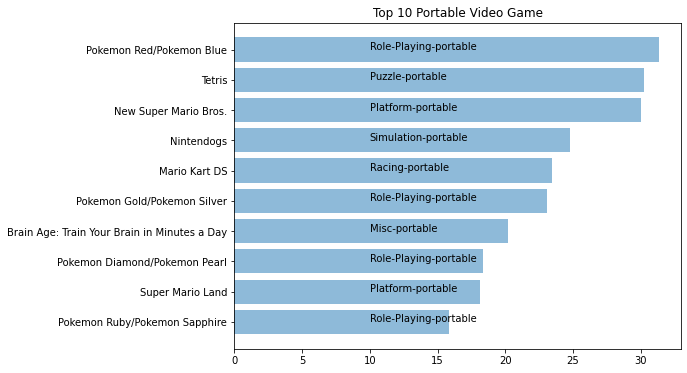

In [59]:
plt.figure(figsize=(8,6))
plt.barh(df.loc[df['Use']=='portable'].sort_values('total_sales', ascending=False)[:10]['Name'][::-1],
         df.loc[df['Use']=='portable'].sort_values('total_sales', ascending=False)[:10]['total_sales'][::-1],
         alpha=0.5);
plt.title('Top 10 Portable Video Game')
for index in range(10):
  genre = df.loc[df['Use']=='portable'].sort_values('total_sales', ascending=False)[:10]['Genre'][::-1].iloc[index]
  use = df.loc[df['Use']=='portable'].sort_values('total_sales', ascending=False)[:10]['Use'][::-1].iloc[index]
  plt.text(10, index, genre+'-'+use)

# 최근 4년 데이터

In [ ]:
latest_year = drop_na_year.loc[drop_na_year['Year'] >= 2014]
latest_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,Use,Company
18,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03,family,Sony
19,Grand Kingdom,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05,family,Sony
24,Don Bradman Cricket 14,X360,2014.0,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01,family,Microsoft
34,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01,portable,Nintendo
46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03,0.33,family,Sony
...,...,...,...,...,...,...,...,...,...,...,...,...
16572,Koihime Enbu,PS4,2016.0,Fighting,Yeti,0.00,0.00,0.02,0.00,0.02,family,Sony
16576,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08,family,PC
16577,Yoru no Nai Kuni,PS4,2015.0,Role-Playing,Tecmo Koei,0.00,0.00,0.08,0.00,0.08,family,Sony
16582,LEGO The Hobbit,XOne,2014.0,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27,family,Microsoft


미국, 유럽, 일본 어느 한 지역에서라도 판매가 0인 데이터를 제외하고 추출

In [ ]:
cond = (latest_year['NA_Sales'] > 0) & (latest_year['EU_Sales'] > 0) & (latest_year['JP_Sales'] > 0)
latest_popular = latest_year.loc[cond]
latest_popular

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,Use,Company
46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03,0.33,family,Sony
139,Warriors Orochi 3,PS4,2014.0,Action,Tecmo Koei,0.04,0.05,0.04,0.02,0.15,family,Sony
222,Assassin's Creed Chronicles,PSV,2016.0,Action,Ubisoft,0.02,0.06,0.01,0.02,0.11,portable,Sony
242,Code Name: S.T.E.A.M.,3DS,2015.0,Strategy,Nintendo,0.14,0.05,0.01,0.02,0.22,portable,Nintendo
270,The Witch and the Hundred Knight,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0.01,0.05,0.01,0.09,family,Sony
...,...,...,...,...,...,...,...,...,...,...,...,...
16351,Lords of the Fallen,PS4,2014.0,Role-Playing,Square Enix,0.17,0.23,0.02,0.09,0.51,family,Sony
16440,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.14,family,Sony
16503,Metal Gear Solid V: Ground Zeroes,X360,2014.0,Action,Konami Digital Entertainment,0.07,0.06,0.01,0.01,0.15,family,Microsoft
16549,Dead or Alive 5,PS4,2015.0,Fighting,Tecmo Koei,0.09,0.13,0.08,0.04,0.34,family,Sony


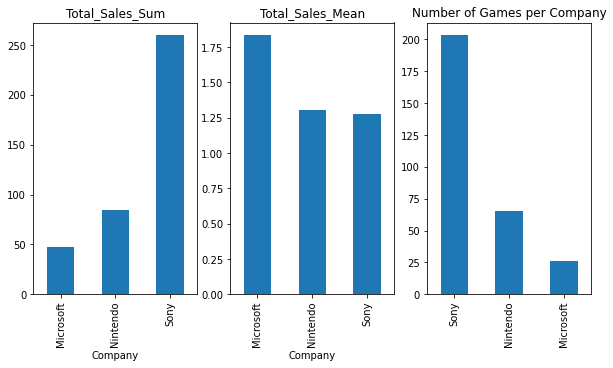

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].set_title('Total_Sales_Sum')
axes[1].set_title('Total_Sales_Mean')
axes[2].set_title('Number of Games per Company')
latest_popular.groupby('Company')['total_sales'].sum().plot.bar(ax=axes[0], figsize=(10,5));
latest_popular.groupby('Company')['total_sales'].mean().plot.bar(ax=axes[1], figsize=(10,5));
latest_popular['Company'].value_counts().plot.bar(ax=axes[2], figsize=(10,5));

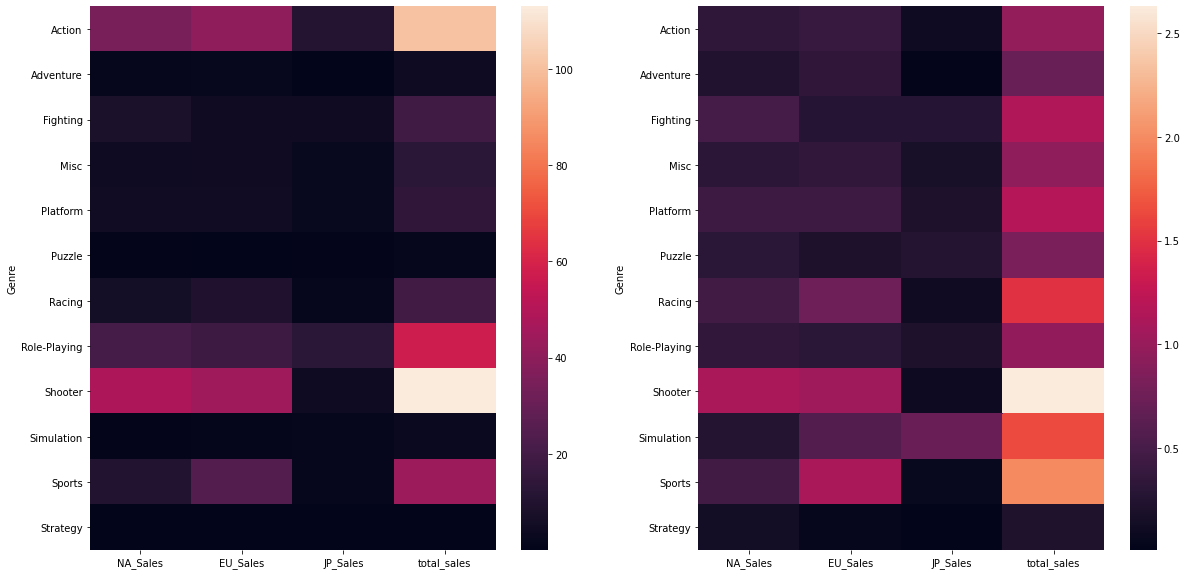

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.heatmap(latest_popular.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'total_sales']].sum())
plt.subplot(122)
sns.heatmap(latest_popular.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'total_sales']].mean())

In [ ]:
onehot_latest = pd.concat([pd.get_dummies(latest_popular['Use'], drop_first=True),
                           pd.get_dummies(latest_popular['Genre'])], axis=1)
onehot_latest = pd.concat([onehot_latest,
                           pd.get_dummies(latest_popular['Company'], drop_first=True)], axis=1)
onehot_latest = pd.concat([latest_popular['Name'], onehot_latest], axis=1)
onehot_latest = pd.concat([onehot_latest, latest_popular[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]], axis=1)
onehot_latest

,Name,portable,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Nintendo,Sony,NA_Sales,EU_Sales,JP_Sales,Other_Sales
46,Resident Evil: Revelations 2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.06,0.08,0.16,0.03
139,Warriors Orochi 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.04,0.05,0.04,0.02
222,Assassin's Creed Chronicles,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.02,0.06,0.01,0.02
242,Code Name: S.T.E.A.M.,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.14,0.05,0.01,0.02
270,The Witch and the Hundred Knight,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.02,0.01,0.05,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16351,Lords of the Fallen,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.17,0.23,0.02,0.09
16440,Far Cry: Primal,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.59,1.16,0.06,0.33
16503,Metal Gear Solid V: Ground Zeroes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0.06,0.01,0.01
16549,Dead or Alive 5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.09,0.13,0.08,0.04


In [354]:
onehot_latest[3:10]

,portable,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Nintendo,Sony,NA_Sales,EU_Sales,JP_Sales,Other_Sales,cluster_label,total_sales,jaccard,kmeans,pca_cluster_label,pca_kmeans
Name,,,,,,,,,,,,,,,,,,,,,,,,,
Code Name: S.T.E.A.M.,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.14,0.05,0.01,0.02,271,0.22,0,1,3,1
The Witch and the Hundred Knight,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.02,0.01,0.05,0.01,268,0.09,0,0,3,1
One Piece: Unlimited World Red,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.09,0.12,0.06,0.05,287,0.32,0,0,1,0
Chibi-Robo! Zip Lash,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0.09,0.08,0.06,0.02,286,0.25,0,1,0,3
Call of Duty: Advanced Warfare,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1.54,1.94,0.19,0.77,285,4.44,0,2,1,2
The LEGO Movie Videogame,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0.28,0.31,0.05,0.05,284,0.69,0,1,3,3
Monster Hunter 4 Ultimate,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0.67,0.49,2.62,0.11,283,3.89,0,1,3,1


In [ ]:
onehot_latest.to_csv('onehot_latest.csv', header=True)

In [60]:
uploaded = files.upload()

Saving onehot_latest.csv to onehot_latest.csv


In [61]:
onehot_latest = pd.read_csv('onehot_latest.csv', index_col='Name')
onehot_latest = onehot_latest.iloc[:,1:]
onehot_latest

,portable,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Nintendo,Sony,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,,,,,,,,,,,,,,,
Resident Evil: Revelations 2,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0.06,0.08,0.16,0.03
Warriors Orochi 3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.04,0.05,0.04,0.02
Assassin's Creed Chronicles,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.02,0.06,0.01,0.02
Code Name: S.T.E.A.M.,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.14,0.05,0.01,0.02
The Witch and the Hundred Knight,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.02,0.01,0.05,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lords of the Fallen,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.17,0.23,0.02,0.09
Far Cry: Primal,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.59,1.16,0.06,0.33
Metal Gear Solid V: Ground Zeroes,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.07,0.06,0.01,0.01


In [64]:
from sklearn.preprocessing import StandardScaler
onehot_latest_label = onehot_latest.iloc[:, :-5]
sc = StandardScaler()
x_std = sc.fit_transform(onehot_latest_label)

### PCA 수행

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_pca = pca.fit_transform(x_std)
pca.explained_variance_ratio_

array([0.14197669, 0.12637875, 0.12100263, 0.09123527, 0.07995511,
       0.07544224, 0.06845386, 0.06434066, 0.05828011, 0.05374547,
       0.03560292, 0.03248856, 0.02853472, 0.022563  ])

In [66]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14197669, 0.26835544, 0.38935807, 0.48059334, 0.56054845,
       0.63599069, 0.70444456, 0.76878521, 0.82706533, 0.8808108 ,
       0.91641372, 0.94890228, 0.977437  , 1.        ])

In [295]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_std)
x_pca

array([[-2.15786375,  0.06679901,  0.84521378,  0.13208604,  1.21334408],
       [-0.58920395, -0.42182286, -0.88103647,  0.80283678, -0.68701706],
       [ 0.30783086, -1.35419235, -1.28295108,  0.33382694, -0.44811541],
       ...,
       [-0.58920395, -0.42182286, -0.88103647,  0.80283678, -0.68701706],
       [ 0.3641875 ,  1.74690258, -0.18206891, -0.12996067,  0.14604137],
       [ 0.60871752,  2.55795666, -0.18185818, -1.03223366, -1.18364176]])

In [81]:
onehot_latest['total_sales'] = onehot_latest['NA_Sales'] + onehot_latest['EU_Sales'] + onehot_latest['JP_Sales'] + onehot_latest['Other_Sales']

In [296]:
euclidean_clusters_pca = AgglomerativeClustering(n_clusters = None,
                                             distance_threshold=0,
                                             affinity = 'euclidean',
                                             linkage='ward')
euclidean_clusters_pca.fit(x_pca)
onehot_latest['pca_cluster_label'] = euclidean_clusters_pca.labels_

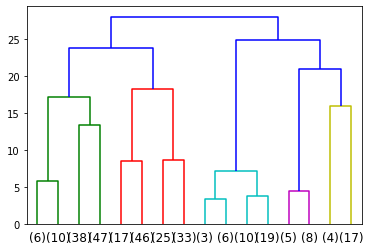

In [297]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(euclidean_clusters_pca, truncate_mode='level', p=3)

In [343]:
from scipy import stats
for i in range(4):
  print(stats.kstest(onehot_latest.loc[onehot_latest['pca_kmeans']==i]['total_sales'], 'norm'))

KstestResult(statistic=0.5279031701805211, pvalue=2.151553299864458e-23)
KstestResult(statistic=0.5239221826541068, pvalue=1.4809706708054434e-24)
KstestResult(statistic=0.5283716429344971, pvalue=1.5629530281704262e-19)
KstestResult(statistic=0.5159534368528308, pvalue=3.5893675841501255e-10)


In [306]:
km_pca = KMeans(n_clusters = 4)
pca_km = km_pca.fit_predict(x_pca)
onehot_latest['pca_kmeans'] = pca_km
onehot_latest['pca_kmeans'].value_counts()

1    94
0    88
2    73
3    39
Name: pca_kmeans, dtype: int64

In [344]:
stats.f_oneway(A, B, C, D)

F_onewayResult(statistic=6.10068482703761, pvalue=0.0004887075966137238)

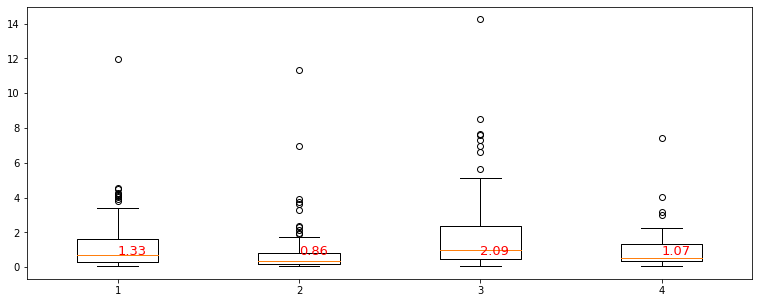

In [325]:
plt.figure(figsize=(13,5))
plt.boxplot(onehot_latest.groupby('pca_kmeans')['total_sales'].apply(list).values);
for i in range(4):
  x = onehot_latest.loc[onehot_latest['pca_kmeans']==i]
  mean = (x['NA_Sales'] + x['EU_Sales'] + x['JP_Sales'] + x['Other_Sales']).mean()
  plt.text(i+1, 0.7, round(mean,2), color='red', fontsize=13)

In [341]:
A = onehot_latest.loc[onehot_latest['pca_kmeans']==0]['total_sales']
B = onehot_latest.loc[onehot_latest['pca_kmeans']==1]['total_sales']
C = onehot_latest.loc[onehot_latest['pca_kmeans']==2]['total_sales']
D = onehot_latest.loc[onehot_latest['pca_kmeans']==3]['total_sales']

from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C) + ['D'] * len(D)
Data = A.tolist() + B.tolist() + C.tolist() + D.tolist()

print(pairwise_tukeyhsd(Data, Group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B  -0.4681 0.3398 -1.1908 0.2546  False
     A      C   0.7572 0.0565 -0.0141 1.5286  False
     A      D  -0.2592 0.8842 -1.1965 0.6781  False
     B      C   1.2253  0.001  0.4652 1.9854   True
     B      D   0.2089    0.9 -0.7191  1.137  False
     C      D  -1.0164  0.035 -1.9828  -0.05   True
---------------------------------------------------


### PCA 미수행 군집화

In [289]:
from sklearn.cluster import AgglomerativeClustering

euclidean_clusters = AgglomerativeClustering(n_clusters = None,
                                             distance_threshold=0,
                                             affinity = 'euclidean',
                                             linkage='ward')
euclidean_clusters.fit(x_std)
onehot_latest['cluster_label'] = euclidean_clusters.labels_

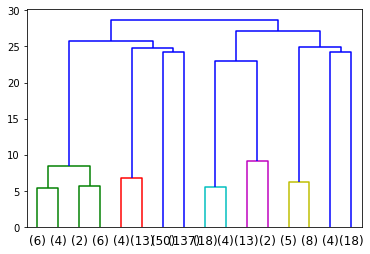

In [284]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(euclidean_clusters, truncate_mode='level', p=3)

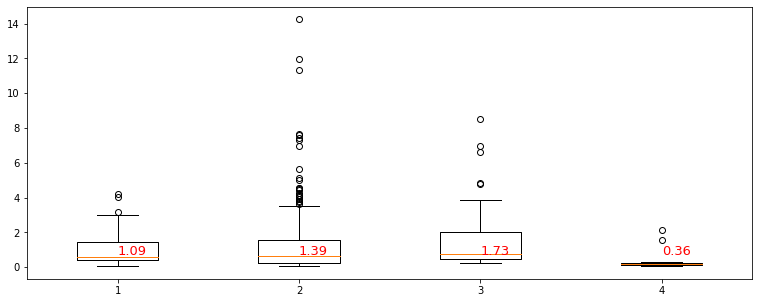

In [274]:
plt.figure(figsize=(13,5))
plt.boxplot(onehot_latest.groupby('cluster_label')['total_sales'].apply(list).values);
for i in range(4):
  x = onehot_latest.loc[onehot_latest['cluster_label']==i]
  mean = (x['NA_Sales'] + x['EU_Sales'] + x['JP_Sales'] + x['Other_Sales']).mean()
  plt.text(i+1, 0.7, round(mean,2), color='red', fontsize=13)

In [101]:
for i in range(5):
  x = onehot_latest.loc[onehot_latest['cluster_label']==i]
  mean = (x['NA_Sales'] + x['EU_Sales'] + x['JP_Sales'] + x['Other_Sales']).mean()
  print(mean)

1.388186274509803
1.200909090909091
1.7275675675675675
0.35777777777777775
0.9038461538461539


In [ ]:
for i in range(6):
  x = onehot_latest.loc[onehot_latest['cluster_label']==i]
  mean = (x['NA_Sales'] + x['EU_Sales'] + x['JP_Sales'] + x['Other_Sales']).sum()
  print(mean)

230.14000000000001
63.92
61.710000000000015
6.4399999999999995
10.18
19.33


In [ ]:
for i in range(6):
  x = onehot_latest.loc[onehot_latest['cluster_label']==i]
  mean = (x['NA_Sales'] + x['EU_Sales'] + x['JP_Sales'] + x['Other_Sales']).var()
  print(mean)

4.257408663522011
4.3351355855855855
3.097601959361392
0.30933594771241824
0.7672361111111111
3.963522058823529


In [273]:
onehot_latest.loc[onehot_latest['cluster_label']==3]

,portable,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Nintendo,Sony,NA_Sales,EU_Sales,JP_Sales,Other_Sales,cluster_label,total_sales,jaccard,kmeans
Name,,,,,,,,,,,,,,,,,,,,,,,
Code Name: S.T.E.A.M.,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.14,0.05,0.01,0.02,3,0.22,0,1
Dynasty Warriors 8: Xtreme Legends,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0.09,0.11,0.06,0.04,3,0.30,0,0
Disgaea 5: Alliance of Vengeance,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.10,0.08,0.06,0.04,3,0.28,0,2
Stella Glow,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0.16,0.01,0.05,0.02,3,0.24,0,1
Bladestorm: Nightmare,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0.07,0.04,0.03,0.02,3,0.16,0,0
Hyperdevotion Noire: Goddess Black Heart,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.08,0.02,0.06,0.03,3,0.19,0,1
Tokyo Twilight Ghost Hunters,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.06,0.01,0.02,0.02,3,0.11,0,1
Transformer: Rise of the Dark Spark,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.07,0.10,0.01,0.04,3,0.22,0,0
Valkyria Chronicles,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.06,0.04,0.05,0.02,3,0.17,0,2


In [275]:
jaccard_clusters = AgglomerativeClustering(n_clusters = 4,
                                   affinity = 'jaccard',
                                   linkage='average')
jaccard_clusters.fit(onehot_latest_label)
onehot_latest['jaccard'] = jaccard_clusters.labels_
onehot_latest['jaccard'].value_counts()

0    258
1     22
2     13
3      1
Name: jaccard, dtype: int64

In [279]:
onehot_latest.loc[onehot_latest['jaccard']==2][['Action', 'Adventure', 'Role-Playing', 'Shooter']].value_counts()

Action  Adventure  Role-Playing  Shooter
0       0          0             0          12
1       0          0             0           1
dtype: int64

In [200]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
y_km = km.fit_predict(x_std)
onehot_latest['kmeans'] = y_km
onehot_latest['kmeans'].value_counts()

0    132
2     90
1     72
Name: kmeans, dtype: int64

In [236]:
onehot_latest.loc[onehot_latest['kmeans']==2]

,portable,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Nintendo,Sony,NA_Sales,EU_Sales,JP_Sales,Other_Sales,cluster_label,total_sales,jaccard,kmeans
Name,,,,,,,,,,,,,,,,,,,,,,,
Call of Duty: Advanced Warfare,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1.54,1.94,0.19,0.77,0,4.44,1,2
Ar Nosurge: Ode to an Unborn Star,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.05,0.04,0.06,0.02,0,0.17,0,2
Plants vs. Zombies: Garden Warfare,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.22,0.40,0.01,0.14,0,0.77,1,2
Rare Replay,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0.47,0.21,0.01,0.07,1,0.76,0,2
Disgaea 5: Alliance of Vengeance,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.10,0.08,0.06,0.04,3,0.28,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FIFA 17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.28,3.75,0.06,0.69,2,4.78,4,2
Pro Evolution Soccer 2015,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.10,0.23,0.22,0.08,2,0.63,4,2
Call of Duty: Black Ops 3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.52,2.09,0.01,0.67,0,7.29,1,2


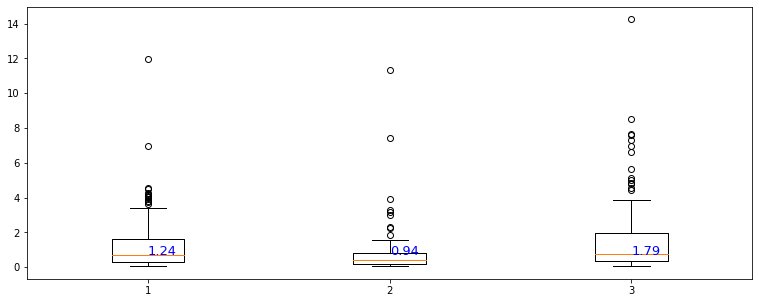

In [217]:
plt.figure(figsize=(13,5))
plt.boxplot(onehot_latest.groupby('kmeans')['total_sales'].apply(list).values);
for i in range(3):
  x = onehot_latest.loc[onehot_latest['kmeans']==i]
  mean = (x['NA_Sales'] + x['EU_Sales'] + x['JP_Sales'] + x['Other_Sales']).mean()
  plt.text(i+1, 0.7, round(mean,2), color='blue', fontsize=13)

In [235]:
for i in range(3):
  x = onehot_latest.loc[onehot_latest['kmeans']==i]
  x = (x['NA_Sales'] + x['EU_Sales'] + x['JP_Sales'] + x['Other_Sales'])
  print(np.var(x))

2.521974977043159
2.800102700617284
5.900458320987653
